# Линейная алгебра: аппроксимация функций

**Задача 2: аппроксимация функции**  
Рассмотрим сложную математическую функцию на отрезке [1, 15]: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)  
Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.  
1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации? 
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

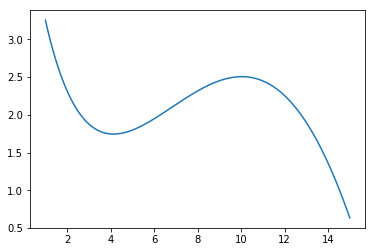

In [2]:
p = np.arange(1,15.1, .1)
f0 = np.sin(p / 5) * np.exp(p / 10) + 5 * np.exp(-p / 2)
plt.plot(p,f0)
plt.show()

In [3]:
points = (1, 15)
bs = []
for i in points:
    print(np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2))
    bs.append(np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2))

3.252216865271419
0.6352214195786656


In [4]:
a = np.array([[points[0], 1], [points[1], 1]])
b = np.array([np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2) for i in points])
x_1 = np.linalg.solve(a,b)
x_1

array([-0.18692825,  3.43914511])

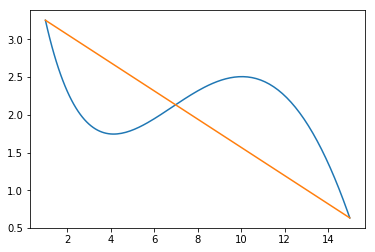

In [5]:
p = np.arange(1,15.1,.1)
f0 = np.sin(p / 5) * np.exp(p / 10) + 5 * np.exp(-p / 2)
f1 = x_1[0] * p + x_1[1]
plt.plot(p,f0)
plt.plot(p, f1)
plt.show()

In [6]:
points = 1, 8, 15
bs = []
for x in points:
    print(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))
    bs.append(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

3.252216865271419
2.316170159053224
0.6352214195786656


In [7]:
a = np.array([[points[0]**2, points[0], 1], [points[1]**2, points[1], 1], [points[2]**2, points[2], 1]])
b = np.array(bs)
x_2 = np.linalg.solve(a,b)
x_2

array([-0.00760104, -0.06531159,  3.32512949])

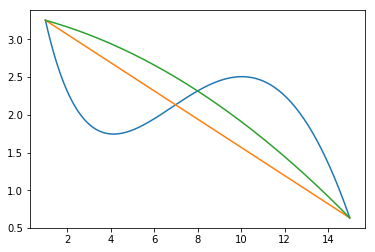

In [8]:
p = np.arange(1,15.1,.1)
f0 = np.sin(p / 5) * np.exp(p / 10) + 5 * np.exp(-p / 2)
f1 = x_1[0] * p + x_1[1]
f2 = x_2[0] * p**2 + x_2[1] * p + x_2[2]
plt.plot(p, f0)
plt.plot(p, f1)
plt.plot(p, f2)
plt.show()

In [9]:
points = 1, 4, 10, 15
bs = []
for i in points:
    print(np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2))
    bs.append(np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2))

3.252216865271419
1.7468459495903677
2.5054164070002463
0.6352214195786656


In [10]:
a = np.array([
    [points[0]**3, points[0]**2, points[0], 1], 
    [points[1]**3, points[1]**2, points[1], 1], 
    [points[2]**3, points[2]**2, points[2], 1], 
    [points[3]**3, points[3]**2, points[3], 1]])
b = np.array(bs)
x_3 = np.linalg.solve(a,b)
x_3

array([-0.00823565,  0.19333685, -1.29552587,  4.36264154])

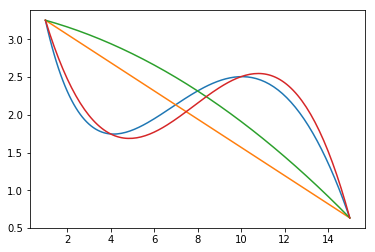

In [11]:
p = np.arange(1,15.1,.1)
f0 = np.sin(p / 5) * np.exp(p / 10) + 5 * np.exp(-p / 2)
f1 = x_1[0] * p + x_1[1]
f2 = x_2[0] * p**2 + x_2[1] * p + x_2[2]
f3 = x_3[0] * p**3 + x_3[1] * p**2 + x_3[2] * p + x_3[3]
plt.plot(p,f0)
plt.plot(p, f1)
plt.plot(p, f2)
plt.plot(p, f3)
plt.show()

In [12]:
strng = ''.join(str(x_3[::-1]))
print(strng)
with open('submission2.txt', 'w') as f:
    f.write(strng)    

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
